In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def set_axis_style(ax, labels):
    ax.xaxis.set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    
def plot_violin_graph(list_of_data, title):
    # Create a figure instance
    label = ["Cossine", "MSD", "Pearson", "Pearson Baseline"]
    fig = plt.figure()
  
    # Create an axes instance
    ax = fig.gca()
    ax.set_title(title)
    set_axis_style(ax, label)
    # Create the violinplot
    violinplot = ax.violinplot(list_of_data)
    plt.show()
    

In [3]:
cossine_fold_0 = pd.read_parquet(f"../predictions/knn_with_z_score/anime_type_tv/no_filter/knn_with_z_score_cosine_0.parquet")
cossine_fold_1 = pd.read_parquet(f"../predictions/knn_with_z_score/anime_type_tv/no_filter/knn_with_z_score_cosine_1.parquet")
cossine_fold_2 = pd.read_parquet(f"../predictions/knn_with_z_score/anime_type_tv/no_filter/knn_with_z_score_cosine_2.parquet")
cossine_fold_3 = pd.read_parquet(f"../predictions/knn_with_z_score/anime_type_tv/no_filter/knn_with_z_score_cosine_3.parquet")
cossine_fold_4 = pd.read_parquet(f"../predictions/knn_with_z_score/anime_type_tv/no_filter/knn_with_z_score_cosine_4.parquet")

cossine = pd.concat([cossine_fold_0, cossine_fold_1, cossine_fold_2, cossine_fold_3, cossine_fold_4])

In [4]:
msd_fold_0 = pd.read_parquet(f"../predictions/knn_with_z_score/anime_type_tv/no_filter/knn_with_z_score_msd_0.parquet")
msd_fold_1 = pd.read_parquet(f"../predictions/knn_with_z_score/anime_type_tv/no_filter/knn_with_z_score_msd_1.parquet")
msd_fold_2 = pd.read_parquet(f"../predictions/knn_with_z_score/anime_type_tv/no_filter/knn_with_z_score_msd_2.parquet")
msd_fold_3 = pd.read_parquet(f"../predictions/knn_with_z_score/anime_type_tv/no_filter/knn_with_z_score_msd_3.parquet")
msd_fold_4 = pd.read_parquet(f"../predictions/knn_with_z_score/anime_type_tv/no_filter/knn_with_z_score_msd_4.parquet")

msd = pd.concat([msd_fold_0, msd_fold_1, msd_fold_2, msd_fold_3, msd_fold_4])

In [5]:
pearson_baseline_fold_0 = pd.read_parquet(f"../predictions/knn_with_z_score/anime_type_tv/no_filter/knn_with_z_score_pearson_baseline_0.parquet")
pearson_baseline_fold_1 = pd.read_parquet(f"../predictions/knn_with_z_score/anime_type_tv/no_filter/knn_with_z_score_pearson_baseline_1.parquet")
pearson_baseline_fold_2 = pd.read_parquet(f"../predictions/knn_with_z_score/anime_type_tv/no_filter/knn_with_z_score_pearson_baseline_2.parquet")
pearson_baseline_fold_3 = pd.read_parquet(f"../predictions/knn_with_z_score/anime_type_tv/no_filter/knn_with_z_score_pearson_baseline_3.parquet")
pearson_baseline_fold_4 = pd.read_parquet(f"../predictions/knn_with_z_score/anime_type_tv/no_filter/knn_with_z_score_pearson_baseline_4.parquet")

pearson_baseline = pd.concat([pearson_baseline_fold_0, pearson_baseline_fold_1, pearson_baseline_fold_2, pearson_baseline_fold_3, pearson_baseline_fold_4])

In [6]:
pearson_fold_0 = pd.read_parquet(f"../predictions/knn_with_z_score/anime_type_tv/no_filter/knn_with_z_score_pearson_0.parquet")
pearson_fold_1 = pd.read_parquet(f"../predictions/knn_with_z_score/anime_type_tv/no_filter/knn_with_z_score_pearson_1.parquet")
pearson_fold_2 = pd.read_parquet(f"../predictions/knn_with_z_score/anime_type_tv/no_filter/knn_with_z_score_pearson_2.parquet")
pearson_fold_3 = pd.read_parquet(f"../predictions/knn_with_z_score/anime_type_tv/no_filter/knn_with_z_score_pearson_3.parquet")
pearson_fold_4 = pd.read_parquet(f"../predictions/knn_with_z_score/anime_type_tv/no_filter/knn_with_z_score_pearson_4.parquet")

pearson = pd.concat([pearson_fold_0, pearson_fold_1, pearson_fold_2, pearson_fold_3, pearson_fold_4])

In [7]:
est_list = [
    cossine["est"].to_list(),
    msd["est"].to_list(),
    pearson["est"].to_list(),
    pearson_baseline["est"].to_list(),
]

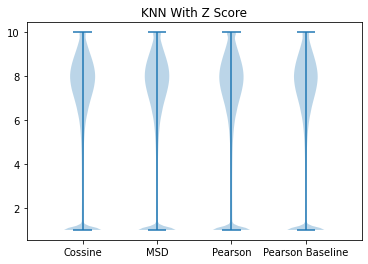

In [8]:
plot_violin_graph(est_list, title="KNN With Z Score")

In [9]:
def round_est_values(df):
    round_actual = np.round(df["est"], decimals=0)
    round_actual = round_actual.reset_index()
    df = df.reset_index()[["index", "actual", "details"]]
    df = df.merge(round_actual, on="index", how="left")
    df = df.set_index("index")
    grouped = df.groupby("est", as_index=False).count()
    return grouped

In [10]:
cossine_grouped = round_est_values(cossine)
print(cossine_grouped)

    est   actual  details
0   1.0  3562625  3562625
1   2.0   441305   441305
2   3.0   431295   431295
3   4.0   522980   522980
4   5.0   893950   893950
5   6.0  2169735  2169735
6   7.0  5149391  5149391
7   8.0  7368120  7368120
8   9.0  4684940  4684940
9  10.0  1193635  1193635


In [11]:
msd_grouped = round_est_values(msd)
print(msd_grouped)

    est   actual  details
0   1.0  3567210  3567210
1   2.0   464925   464925
2   3.0   445975   445975
3   4.0   547010   547010
4   5.0   924770   924770
5   6.0  2157946  2157946
6   7.0  4978345  4978345
7   8.0  7177460  7177460
8   9.0  4747375  4747375
9  10.0  1406960  1406960


In [12]:
pearson_baseline_grouped = round_est_values(pearson_baseline)
print(pearson_baseline_grouped)

    est   actual  details
0   1.0  3670585  3670585
1   2.0   365415   365415
2   3.0   376645   376645
3   4.0   492245   492245
4   5.0   899875   899875
5   6.0  2231730  2231730
6   7.0  5143150  5143150
7   8.0  7205001  7205001
8   9.0  4729510  4729510
9  10.0  1303820  1303820


In [13]:
pearson_grouped = round_est_values(pearson)
print(pearson_grouped)

    est   actual  details
0   1.0  3589060  3589060
1   2.0   461115   461115
2   3.0   441695   441695
3   4.0   539885   539885
4   5.0   917880   917880
5   6.0  2208215  2208215
6   7.0  5071171  5071171
7   8.0  7073440  7073440
8   9.0  4605725  4605725
9  10.0  1509790  1509790


In [14]:
cossine_grouped = cossine_grouped.rename(columns={"actual": "cossine"})
msd_grouped = msd_grouped.rename(columns={"actual": "msd"})
pearson_baseline_grouped = pearson_baseline_grouped.rename(columns={"actual": "pearson baseline"})
pearson_grouped = pearson_grouped.rename(columns={"actual": "pearson"})

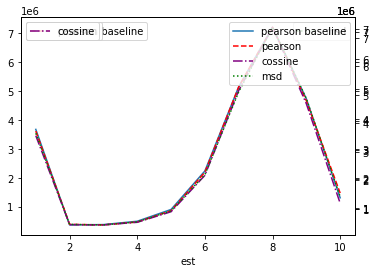

In [15]:
fig, ax = plt.subplots()
ax1 = ax.twinx()
ax2 = ax.twinx()
ax3 = ax.twinx()

cossine_grouped.plot(x="est", y=["cossine"], ax=ax2, ls="dashdot", color="purple")
msd_grouped.plot(x="est", y=["msd"], ax=ax3, ls="dotted", color="green")
pearson_baseline_grouped.plot(x="est", y=["pearson baseline"], ax=ax)
pearson_grouped.plot(x="est", y=["pearson"], ax=ax1, ls="dashed", color="red")
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)

In [16]:
cossine_fold_0 = pd.read_parquet(f"../predictions/knn_with_z_score/anime_type_tv/with_filter_remove_negative/knn_with_z_score_cosine_0.parquet")
cossine_fold_1 = pd.read_parquet(f"../predictions/knn_with_z_score/anime_type_tv/with_filter_remove_negative/knn_with_z_score_cosine_1.parquet")
cossine_fold_2 = pd.read_parquet(f"../predictions/knn_with_z_score/anime_type_tv/with_filter_remove_negative/knn_with_z_score_cosine_2.parquet")
cossine_fold_3 = pd.read_parquet(f"../predictions/knn_with_z_score/anime_type_tv/with_filter_remove_negative/knn_with_z_score_cosine_3.parquet")
cossine_fold_4 = pd.read_parquet(f"../predictions/knn_with_z_score/anime_type_tv/with_filter_remove_negative/knn_with_z_score_cosine_4.parquet")

cossine = pd.concat([cossine_fold_0, cossine_fold_1, cossine_fold_2, cossine_fold_3, cossine_fold_4])

In [17]:
msd_fold_0 = pd.read_parquet(f"../predictions/knn_with_z_score/anime_type_tv/with_filter_remove_negative/knn_with_z_score_msd_0.parquet")
msd_fold_1 = pd.read_parquet(f"../predictions/knn_with_z_score/anime_type_tv/with_filter_remove_negative/knn_with_z_score_msd_1.parquet")
msd_fold_2 = pd.read_parquet(f"../predictions/knn_with_z_score/anime_type_tv/with_filter_remove_negative/knn_with_z_score_msd_2.parquet")
msd_fold_3 = pd.read_parquet(f"../predictions/knn_with_z_score/anime_type_tv/with_filter_remove_negative/knn_with_z_score_msd_3.parquet")
msd_fold_4 = pd.read_parquet(f"../predictions/knn_with_z_score/anime_type_tv/with_filter_remove_negative/knn_with_z_score_msd_4.parquet")

msd = pd.concat([msd_fold_0, msd_fold_1, msd_fold_2, msd_fold_3, msd_fold_4])

In [18]:
pearson_baseline_fold_0 = pd.read_parquet(f"../predictions/knn_with_z_score/anime_type_tv/with_filter_remove_negative/knn_with_z_score_pearson_baseline_0.parquet")
pearson_baseline_fold_1 = pd.read_parquet(f"../predictions/knn_with_z_score/anime_type_tv/with_filter_remove_negative/knn_with_z_score_pearson_baseline_1.parquet")
pearson_baseline_fold_2 = pd.read_parquet(f"../predictions/knn_with_z_score/anime_type_tv/with_filter_remove_negative/knn_with_z_score_pearson_baseline_2.parquet")
pearson_baseline_fold_3 = pd.read_parquet(f"../predictions/knn_with_z_score/anime_type_tv/with_filter_remove_negative/knn_with_z_score_pearson_baseline_3.parquet")
pearson_baseline_fold_4 = pd.read_parquet(f"../predictions/knn_with_z_score/anime_type_tv/with_filter_remove_negative/knn_with_z_score_pearson_baseline_4.parquet")

pearson_baseline = pd.concat([pearson_baseline_fold_0, pearson_baseline_fold_1, pearson_baseline_fold_2, pearson_baseline_fold_3, pearson_baseline_fold_4])

In [19]:
pearson_fold_0 = pd.read_parquet(f"../predictions/knn_with_z_score/anime_type_tv/with_filter_remove_negative/knn_with_z_score_pearson_0.parquet")
pearson_fold_1 = pd.read_parquet(f"../predictions/knn_with_z_score/anime_type_tv/with_filter_remove_negative/knn_with_z_score_pearson_1.parquet")
pearson_fold_2 = pd.read_parquet(f"../predictions/knn_with_z_score/anime_type_tv/with_filter_remove_negative/knn_with_z_score_pearson_2.parquet")
pearson_fold_3 = pd.read_parquet(f"../predictions/knn_with_z_score/anime_type_tv/with_filter_remove_negative/knn_with_z_score_pearson_3.parquet")
pearson_fold_4 = pd.read_parquet(f"../predictions/knn_with_z_score/anime_type_tv/with_filter_remove_negative/knn_with_z_score_pearson_4.parquet")

pearson = pd.concat([pearson_fold_0, pearson_fold_1, pearson_fold_2, pearson_fold_3, pearson_fold_4])

In [20]:
est_list = [
    cossine["est"].to_list(),
    msd["est"].to_list(),
    pearson["est"].to_list(),
    pearson_baseline["est"].to_list(),
]

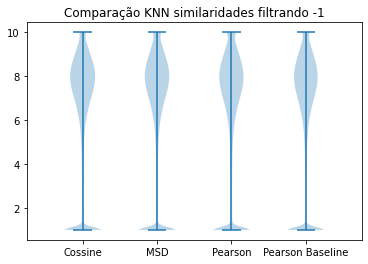

In [21]:
plot_violin_graph(est_list, title="Comparação KNN similaridades filtrando -1")

In [22]:
cossine_grouped = round_est_values(cossine)
print(cossine_grouped)

    est   actual  details
0   1.0  3558435  3558435
1   2.0   446240   446240
2   3.0   432170   432170
3   4.0   520790   520790
4   5.0   894175   894175
5   6.0  2166280  2166280
6   7.0  5152530  5152530
7   8.0  7371896  7371896
8   9.0  4681980  4681980
9  10.0  1193480  1193480


In [23]:
msd_grouped = round_est_values(msd)
print(msd_grouped)

    est   actual  details
0   1.0  3570256  3570256
1   2.0   462890   462890
2   3.0   443795   443795
3   4.0   547245   547245
4   5.0   923070   923070
5   6.0  2160255  2160255
6   7.0  4981925  4981925
7   8.0  7177695  7177695
8   9.0  4746290  4746290
9  10.0  1404555  1404555


In [24]:
pearson_baseline_grouped = round_est_values(pearson_baseline)
print(pearson_baseline_grouped)

    est   actual  details
0   1.0  3668345  3668345
1   2.0   368210   368210
2   3.0   373700   373700
3   4.0   493910   493910
4   5.0   900725   900725
5   6.0  2228940  2228940
6   7.0  5141820  5141820
7   8.0  7206916  7206916
8   9.0  4731585  4731585
9  10.0  1303825  1303825


In [25]:
pearson_grouped = round_est_values(pearson)
print(pearson_grouped)

    est   actual  details
0   1.0  3589920  3589920
1   2.0   460775   460775
2   3.0   440290   440290
3   4.0   540525   540525
4   5.0   918655   918655
5   6.0  2210680  2210680
6   7.0  5073295  5073295
7   8.0  7068205  7068205
8   9.0  4607630  4607630
9  10.0  1508001  1508001


In [26]:
cossine_grouped = cossine_grouped.rename(columns={"actual": "cossine"})
msd_grouped = msd_grouped.rename(columns={"actual": "msd"})
pearson_baseline_grouped = pearson_baseline_grouped.rename(columns={"actual": "pearson baseline"})
pearson_grouped = pearson_grouped.rename(columns={"actual": "pearson"})

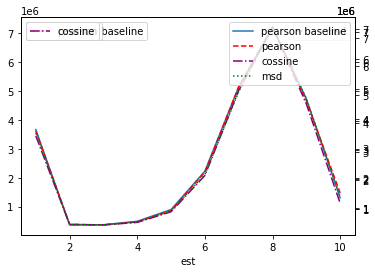

In [27]:
fig, ax = plt.subplots()
ax1 = ax.twinx()
ax2 = ax.twinx()
ax3 = ax.twinx()

cossine_grouped.plot(x="est", y=["cossine"], ax=ax2, ls="dashdot", color="purple")
msd_grouped.plot(x="est", y=["msd"], ax=ax3, ls="dotted", color="green")
pearson_baseline_grouped.plot(x="est", y=["pearson baseline"], ax=ax)
pearson_grouped.plot(x="est", y=["pearson"], ax=ax1, ls="dashed", color="red")
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)